In [127]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [128]:
iris = datasets.load_iris()
X = iris.data[:, 2:]
y= iris.target

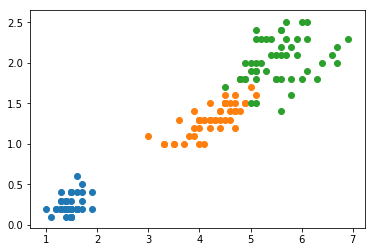

In [129]:
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.show()

In [130]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(max_depth=2, criterion='entropy')
dt_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [131]:
import numpy as np
from matplotlib.colors import ListedColormap

def plot_decision_boundary(model, axis):
    x0, x1 = np.meshgrid(
    np.linspace(axis[0], axis[1], int((axis[1] - axis[0])*100)).reshape(-1, 1),# 不知道reshape()对不对
    np.linspace(axis[2], axis[3], int((axis[3] - axis[2])*100)).reshape(-1, 1)
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    y_predict = model.predict(X_new)  
    zz = y_predict.reshape(x0.shape)
    
    custom_cmap = ListedColormap(['#EF9A9A', '#FFF59D', '#90CAF9'])
    
    plt.contourf(x0, x1, zz, 5, cmap=custom_cmap) 

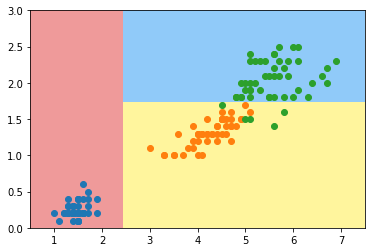

In [132]:
plot_decision_boundary(dt_clf, axis=[0.5, 7.5, 0, 3])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.show()

In [7]:
# 决策树是是非参数学习算法
# 可以解决分类问题
# 天然可以解决多分类问题
# 也可以解决回归问题
# 具有非常好的解释性

## 信息熵

In [133]:
import numpy as np
import matplotlib.pyplot as plt

In [134]:
# 可以处理一个数和一个向量
# 这里只有两个类别
def entropy(p):
    return -p * np.log(p) - (1 - p) * np.log(1 - p)

In [135]:
# 不能取0和1
x = np.linspace(0.01, 0.99, 200)

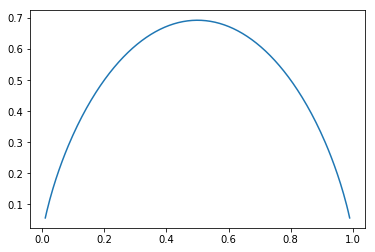

In [136]:
plt.plot(x, entropy(x))
plt.show()

# 系统中，没一个类别都是等概率时，是最不稳定的

### 使用信息熵寻找最优划分

In [137]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:, 2:]
y= iris.target

In [138]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(max_depth=2, criterion='entropy')
dt_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [139]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(model, axis):
    x0, x1 = np.meshgrid(
    np.linspace(axis[0], axis[1], int((axis[1] - axis[0])*100)).reshape(-1, 1),# 不知道reshape()对不对
    np.linspace(axis[2], axis[3], int((axis[3] - axis[2])*100)).reshape(-1, 1)
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    y_predict = model.predict(X_new)  
    zz = y_predict.reshape(x0.shape)
    
    custom_cmap = ListedColormap(['#EF9A9A', '#FFF59D', '#90CAF9'])
    
    plt.contourf(x0, x1, zz, 5, cmap=custom_cmap) 

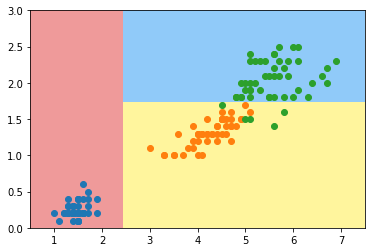

In [140]:
plot_decision_boundary(dt_clf, axis=[0.5, 7.5, 0, 3])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.show()

### 模拟信息熵进行划分

In [141]:
def split(X, y, d, value): # d是维度，value是维度上的值，这里假设已经有了d和value
    index_a = (X[:, d] <= value)
    index_b = (X[:, d] > value)
    return X[index_a], X[index_b], y[index_a], y[index_b] 

In [142]:
from collections import Counter
from math import log

def entropy(y):
    counter = Counter(y)
    res = 0.0
    for num in counter.values():
        p = num / len(y)
        res += -p * log(p)
    return res

def try_split(X, y):
    best_entropy = float('inf')
    best_d, best_v = -1, -1
    for d in range(X.shape[1]):
        sorted_index = np.argsort(X[:, d])
        for i in range(1, len(X)):
            if X[sorted_index[i-1], d] != X[sorted_index[i], d]:
                v = (X[sorted_index[i-1], d] + X[sorted_index[i], d]) / 2
                X_l, X_r, y_l, y_r = split(X, y, d, v)
                e = entropy(y_l) + entropy(y_r)
                if e < best_entropy:
                    best_entropy, best_d, best_v = e, d, v
                    
    return  best_entropy, best_d, best_v

In [143]:
try_split(X, y)

(0.6931471805599453, 0, 2.45)

In [144]:
best_entropy, best_d, best_v = try_split(X, y)
print('best_entropy = ', best_entropy)
print('best_d = ', best_d)
print('best_v = ', best_v) 

# 结果显示在第0个维度上，阈值时2.45上划分的

best_entropy =  0.6931471805599453
best_d =  0
best_v =  2.45


In [145]:
X1_l, X1_r, y1_l, y1_r = split(X, y, best_d, best_v)

In [146]:
entropy(y1_l)

0.0

In [147]:
entropy(y1_r)
# 此时信息熵是0，很容易理解，见上图：划分成功将一类数据划分到左边
# 相应地左边不用再划分了，可以再次对右边进行划分

0.6931471805599453

In [148]:
best_entropy2, best_d2, best_v2 = try_split(X1_r, y1_r)
print('best_entropy = ', best_entropy2)
print('best_d = ', best_d2)
print('best_v= ', best_v2) 

# 可以结合上图看看

best_entropy =  0.4132278899361904
best_d =  1
best_v=  1.75


In [149]:
X2_l, X2_r, y2_l, y2_r = split(X, y, best_d2, best_v2)

In [150]:
entropy(y2_l)

# 没有变为0，其实还可以再深入划分， 这里地深度是2

0.8525876833625409

In [151]:
entropy(y2_r)

# 没有变为0，其实还可以再深入划分

0.10473243910508653

## 基尼系数

In [152]:
# 和之前的信息熵性质一样，基尼系数越高，随机性越强，不确定性越强。

In [193]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:, 2:]
y= iris.target

In [194]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(max_depth=2, criterion='gini') # 注意这里的参数是gini
dt_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [195]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(model, axis):
    x0, x1 = np.meshgrid(
    np.linspace(axis[0], axis[1], int((axis[1] - axis[0])*100)).reshape(-1, 1),
    np.linspace(axis[2], axis[3], int((axis[3] - axis[2])*100)).reshape(-1, 1)
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    y_predict = model.predict(X_new)  
    zz = y_predict.reshape(x0.shape)
    
    custom_cmap = ListedColormap(['#EF9A9A', '#FFF59D', '#90CAF9'])
    
    plt.contourf(x0, x1, zz, 5, cmap=custom_cmap) 

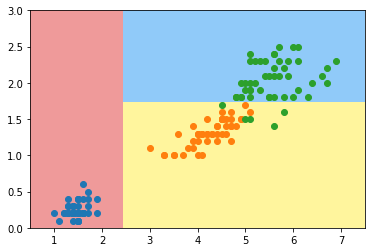

In [196]:
plot_decision_boundary(dt_clf, axis=[0.5, 7.5, 0, 3])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.show()

### 模拟使用基尼系数进行划分

In [197]:
from collections import Counter
from math import log

def split(X, y, d, value): 
    index_a = (X[:, d] <= value)
    index_b = (X[:, d] > value)
    return X[index_a], X[index_b], y[index_a], y[index_b] 

def gini(y):
    counter = Counter(y)
    res = 1.0
    for num in counter.values():
        p = num / len(y)
        res += -p ** 2
    return res

def try_split(X, y):
    best_g = float('inf')
    best_d, best_v = -1, -1
    for d in range(X.shape[1]):
        sorted_index = np.argsort(X[:, d])
        for i in range(1, len(X)):
            if X[sorted_index[i-1], d] != X[sorted_index[i], d]:
                v = (X[sorted_index[i-1], d] + X[sorted_index[i], d]) / 2
                X_l, X_r, y_l, y_r = split(X, y, d, v)
                e = gini(y_l) + gini(y_r)
                if e < best_g:
                    best_g, best_d, best_v = e, d, v
                    
    return  best_g, best_d, best_v

In [198]:
best_g, best_d, best_v = try_split(X, y)
print('best_g = ', best_g)
print('best_d = ', best_d)
print('best_v = ', best_v) 

best_g =  0.5
best_d =  0
best_v =  2.45


In [199]:
X1_l, X1_r, y1_l, y1_r = split(X, y, best_d, best_v)

In [200]:
gini(y1_l)

# 此时左边的数据是没有不确定性的
# 下面将进一步进行划分

0.0

In [201]:
gini(y1_r)

0.5

In [203]:
best_g2, best_d2, best_v2 = try_split(X1_r, y1_r)
print('best_g = ', best_g2)
print('best_d = ', best_d2)
print('best_v = ', best_v2) 

# 基尼系数下降了

best_g =  0.2105714900645938
best_d =  1
best_v =  1.75


In [163]:
X2_l, X2_r, y2_l, y2_r = split(X, y, best_d2, best_v2)

In [164]:
gini(y2_l)

0.5445636094674556

In [165]:
gini(y2_r)

0.04253308128544431

In [166]:
# 信息熵与基尼系数
# 信息熵的计算比较慢一点（因为log函数），scikit-learn 默认使用基尼系数
# 基尼系数与信息熵两者效果是没有优劣的
# 下一节将谈到与决策树相关的更多的超参数，将直接影响模型的优劣

## CART (Classification And Regression Tree) 和决策树的超参数

In [167]:
# 再某一个节点上，根据数据的某一个维度d，以及在维度d上的某一个阈值v进行二分。

# scikit-learn的决策树实现：CART，其他地方的实现方式也有很多，如：ID3，C4.5， C5.0

# 决策树一个很大的问题就是非常容易产生过拟合，这一点和kNN差不多。事实上，对于非参数学习来说，都容易产生过拟合的

# 减枝：降低复杂度，解决过拟合

# max_depth参数其实是实现了一个减枝的性能，限制了高度。除了它，还有：

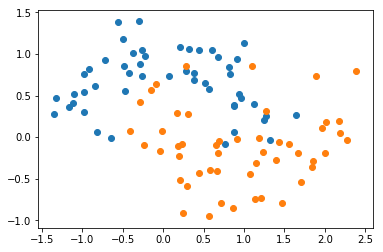

In [168]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

X, y = datasets.make_moons(noise=0.25, random_state=666)

plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

In [169]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier() # 默认标准使用基尼系数，现在不限定max_depth,决策树将一直往下划分，知道划分到每一个节点的基尼系数都为0为止
dt_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [170]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(model, axis):
    x0, x1 = np.meshgrid(
    np.linspace(axis[0], axis[1], int((axis[1] - axis[0])*100)).reshape(-1, 1),
    np.linspace(axis[2], axis[3], int((axis[3] - axis[2])*100)).reshape(-1, 1)
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    y_predict = model.predict(X_new)  
    zz = y_predict.reshape(x0.shape)
    
    custom_cmap = ListedColormap(['#EF9A9A', '#FFF59D', '#90CAF9'])
    
    plt.contourf(x0, x1, zz, 5, cmap=custom_cmap) 

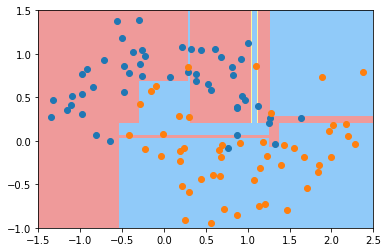

In [171]:
plot_decision_boundary(dt_clf, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

# 形状是不规则的，显然出现了过拟合的现象

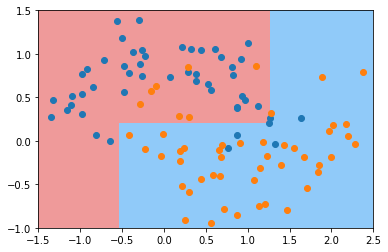

In [172]:
dt_clf2 = DecisionTreeClassifier(max_depth=2) 
dt_clf2.fit(X, y)

plot_decision_boundary(dt_clf2, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

# 边界是非常清晰的，不会产生过拟合的现象。不会针对某几个特别的样本点进行特殊的变化
# 相应的是欠拟和，需要寻找合适的参数值

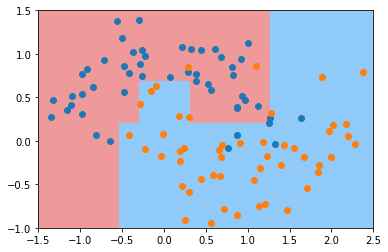

In [173]:
dt_clf3 = DecisionTreeClassifier(min_samples_split=10) # min_samples_split的意思是对于一个节点来说，他至少有多少样本数据，才会继续拆分下去
dt_clf3.fit(X, y)

plot_decision_boundary(dt_clf3, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

# 下图显然过拟合的程度是比较低的，min_samples_split的值越高，越不容易出现过拟合的现象，太高则容易出现欠拟和。

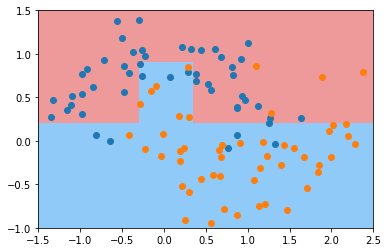

In [174]:
dt_clf4 = DecisionTreeClassifier(min_samples_leaf=6) # min_samples_leaf的意思是对于一个叶子节点来说，他至少有多少样本数据，才会继续拆分下去
dt_clf4.fit(X, y)

plot_decision_boundary(dt_clf4, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

# 越小，越容易出现过拟合

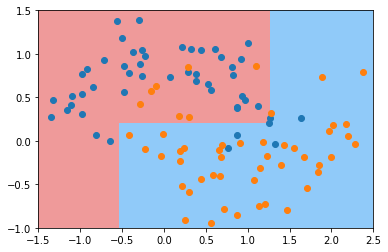

In [175]:
dt_clf4 = DecisionTreeClassifier(max_leaf_nodes=4) # mmax_leaf_nodes的意思是说：最多有多少叶子节点，叶子节点越多，决策树越复杂，越有可能出现过拟合
dt_clf4.fit(X, y)

plot_decision_boundary(dt_clf4, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

In [176]:
# 以上这些参数都解决了过拟合的问题，在实际使用这些参数的时候，可以使用网格搜索进行组合
# 上面都是解决的分类问题，下一节将说一说回归问题

## 决策树解决回归问题

In [177]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

boston = datasets.load_boston()
X = boston.data
y = boston.target

In [178]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

### Decision Tree Regression

In [179]:
from sklearn.tree import DecisionTreeRegressor

dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [180]:
dt_reg.score(X_test, y_test)
# 在测试数据集上表现不佳

0.5931151060832571

In [181]:
dt_reg.score(X_train, y_train)
# 在训练数据集上表现没有偏差，而上面在测试数据集上表现不好， 决策树是非常容易出现过拟合的现象的
# 相应的，要消除这些过拟合，我们就需要使用上一节介绍的一些参数， 用这些参数进行制约决策树防止发生过拟合
# 作业：尝试调参，对于boston房价数据，进行调参，看看最好做到什么样的

1.0

In [182]:
# 基于决策树绘制学习曲线！！尝试画一画
# 绘制模型复杂度曲线！！关注课程的官方github

## 决策树的局限性

In [183]:
# 两个比较重要的缺点：
# 和x轴和y轴是平行的
# 对个别的数据很敏感

### 并查集的局限性

In [204]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:, 2:]
y= iris.target

In [205]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(max_depth=2, criterion='entropy')
tree_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [206]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(model, axis):
    x0, x1 = np.meshgrid(
    np.linspace(axis[0], axis[1], int((axis[1] - axis[0])*100)).reshape(-1, 1),
    np.linspace(axis[2], axis[3], int((axis[3] - axis[2])*100)).reshape(-1, 1)
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    y_predict = model.predict(X_new)  
    zz = y_predict.reshape(x0.shape)
    
    custom_cmap = ListedColormap(['#EF9A9A', '#FFF59D', '#90CAF9'])
    
    plt.contourf(x0, x1, zz, 5, cmap=custom_cmap) 

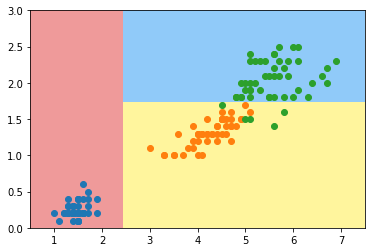

In [207]:
plot_decision_boundary(dt_clf, axis=[0.5, 7.5, 0, 3])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.show()

In [208]:
# 找一个特殊的点，把其删除，看看结果是什么样的

X_new = np.delete(X, 138, axis=0)
y_new = np.delete(y, 138) # 向量，不用指定axis了

In [209]:
X_new.shape

(149, 2)

In [210]:
y_new.shape

(149,)

In [211]:
tree_clf2 = DecisionTreeClassifier(max_depth=2, criterion='entropy')
tree_clf2.fit(X_new, y_new)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

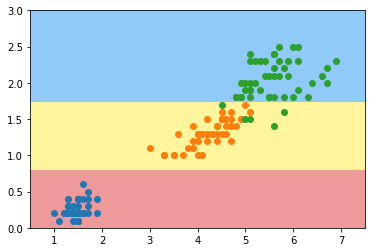

In [213]:
plot_decision_boundary(tree_clf2, axis=[0.5, 7.5, 0, 3])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.show()

# 只删除了一个样本点，得到的决策边界形态和之前就很不一样了。这再次印证了决策树对于个别样本可能比较敏感，其实这是所有非参数学习一个普遍的缺点
#  所以它高度依赖调参，才能得到一个比较好的模型

In [124]:
# 生成的决策边界是横平竖直的，如果数据产生了一点偏斜，那么决策树就不能很好反应数据的分布情况

In [125]:
# 尽管如此，决策树还是比较好的机器学习算法，并不完全单独使用。
# 决策树重要的一个应用就是使用集成学习的方式创建随机森林的算法，而随机森林的方法可以得到一个非常好的结果